In [ ]:
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ex2data1.txt"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(97,)
(97,)
(97, 1)
(97, 1)


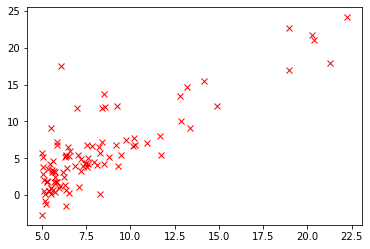

In [ ]:
import os
import matplotlib.pyplot as plt
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]
print(X.shape)
print(Y.shape)
X=X.reshape(97,1)
Y=Y.reshape(97,1)
print(X.shape)
print(Y.shape)

def plotdata(a,b):

  plt.plot(a,b,'x',color='red')

  return

plotdata(X,Y)  # function Call
plt.show()

In [ ]:
import torch
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)
inputs=inputs.float()
targets=targets.float()
print(inputs.dtype)

torch.float32


In [ ]:
import torch.nn as nn

In [ ]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[6.1101],
         [5.5277],
         [8.5186]]), tensor([[17.5920],
         [ 9.1302],
         [13.6620]]))

In [ ]:
import torch.nn.functional as F
from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=False)
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break
model = nn.Linear(1,1)
output = model(inputs)
print(output.size())
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)
opt = torch.optim.SGD(model.parameters(), lr=0.01)

tensor([[6.1101],
        [5.5277],
        [8.5186],
        [7.0032],
        [5.8598]])
tensor([[17.5920],
        [ 9.1302],
        [13.6620],
        [11.8540],
        [ 6.8233]])
torch.Size([97, 1])
tensor(149.3522, grad_fn=<MseLossBackward>)


In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):

    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb,yb in train_dl:

            # 1. Generate predictions
            pred = model(xb)

            # 2. Calculate loss
            loss = loss_fn(pred, yb)

            # 3. Compute gradients
            loss.backward()

            # 4. Update parameters using gradients
            opt.step()

            # 5. Reset the gradients to zero
            opt.zero_grad()

        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
fit(100, model, loss_fn, opt, train_dl)


Epoch [10/100], Loss: 6.4669
Epoch [20/100], Loss: 6.2895
Epoch [30/100], Loss: 6.1360
Epoch [40/100], Loss: 6.0030
Epoch [50/100], Loss: 5.8876
Epoch [60/100], Loss: 5.7873
Epoch [70/100], Loss: 5.7000
Epoch [80/100], Loss: 5.6240
Epoch [90/100], Loss: 5.5577
Epoch [100/100], Loss: 5.4999


In [ ]:
preds = model(inputs)
preds

tensor([[ 4.4267],
        [ 3.9764],
        [ 6.2889],
        [ 5.1172],
        [ 4.2331],
        [ 6.1840],
        [ 5.4831],
        [ 6.3349],
        [ 4.7175],
        [ 3.6106],
        [ 4.1179],
        [10.6540],
        [ 4.1359],
        [ 6.2037],
        [ 4.0637],
        [ 3.8617],
        [ 4.6241],
        [ 3.6689],
        [ 4.6737],
        [ 5.1695],
        [ 4.4878],
        [15.3751],
        [ 3.9473],
        [ 4.5937],
        [ 4.0051],
        [14.3506],
        [ 9.6210],
        [ 8.1743],
        [ 9.8900],
        [16.8697],
        [ 3.7635],
        [ 4.7973],
        [ 6.8531],
        [ 4.2579],
        [ 6.0512],
        [ 5.8365],
        [ 5.9621],
        [ 4.0371],
        [ 9.6272],
        [ 4.6148],
        [ 3.8830],
        [ 5.0239],
        [ 8.7550],
        [ 4.1666],
        [ 5.7524],
        [ 5.1867],
        [ 3.6226],
        [ 4.1880],
        [ 8.7488],
        [ 3.9871],
        [ 5.5324],
        [ 3.8063],
        [ 5.

In [ ]:
targets

tensor([[17.5920],
        [ 9.1302],
        [13.6620],
        [11.8540],
        [ 6.8233],
        [11.8860],
        [ 4.3483],
        [12.0000],
        [ 6.5987],
        [ 3.8166],
        [ 3.2522],
        [15.5050],
        [ 3.1551],
        [ 7.2258],
        [ 0.7162],
        [ 3.5129],
        [ 5.3048],
        [ 0.5608],
        [ 3.6518],
        [ 5.3893],
        [ 3.1386],
        [21.7670],
        [ 4.2630],
        [ 5.1875],
        [ 3.0825],
        [22.6380],
        [13.5010],
        [ 7.0467],
        [14.6920],
        [24.1470],
        [-1.2200],
        [ 5.9966],
        [12.1340],
        [ 1.8495],
        [ 6.5426],
        [ 4.5623],
        [ 4.1164],
        [ 3.3928],
        [10.1170],
        [ 5.4974],
        [ 0.5566],
        [ 3.9115],
        [ 5.3854],
        [ 2.4406],
        [ 6.7318],
        [ 1.0463],
        [ 5.1337],
        [ 1.8440],
        [ 8.0043],
        [ 1.0179],
        [ 6.7504],
        [ 1.8396],
        [ 4.

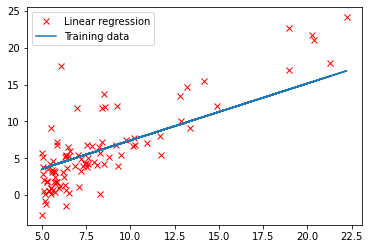

In [ ]:
plotdata(X,Y)
with torch.no_grad():
  plt.plot(X,model(inputs))

plt.legend([ 'Linear regression','Training data',]);

In [ ]:
model(torch.tensor([45.]))

tensor([34.4964], grad_fn=<AddBackward0>)